Objetivo

El objetivo es reducir la dimensionalidad del dataset “Iris” mediante PCA, visualizando las clases en el nuevo espacio bidimensional y evaluando si los componentes principales son capaces de capturar adecuadamente la variabilidad de los datos.

Id → Identificador

SepalLengthCm → Longitud del sépalo (cm)

SepalWidthCm → Ancho del sépalo (cm)

PetalLengthCm → Longitud del pétalo (cm)

PetalWidthCm → Ancho del pétalo (cm)

Species → Especie

Importación de librerías

In [ ]:
# Importa la biblioteca NumPy para operaciones numéricas
import numpy as np
# Importa la biblioteca pandas para manipulación y análisis de datos
import pandas as pd
# Importa Matplotlib para visualización de datos en gráficos
import matplotlib.pyplot as plt
# Importa Seaborn, una biblioteca basada en Matplotlib, para visualizaciones estadísticas más atractivas
import seaborn as sns
# Importa el escalador estándar para normalizar los datos
from sklearn.preprocessing import StandardScaler
# Importa el algoritmo PCA para reducción de dimensionalidad
from sklearn.decomposition import PCA
# Importa la función para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

 # 1- Carga de datos:

Las primeras 5 Filas del DF:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Informaciion del DF:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

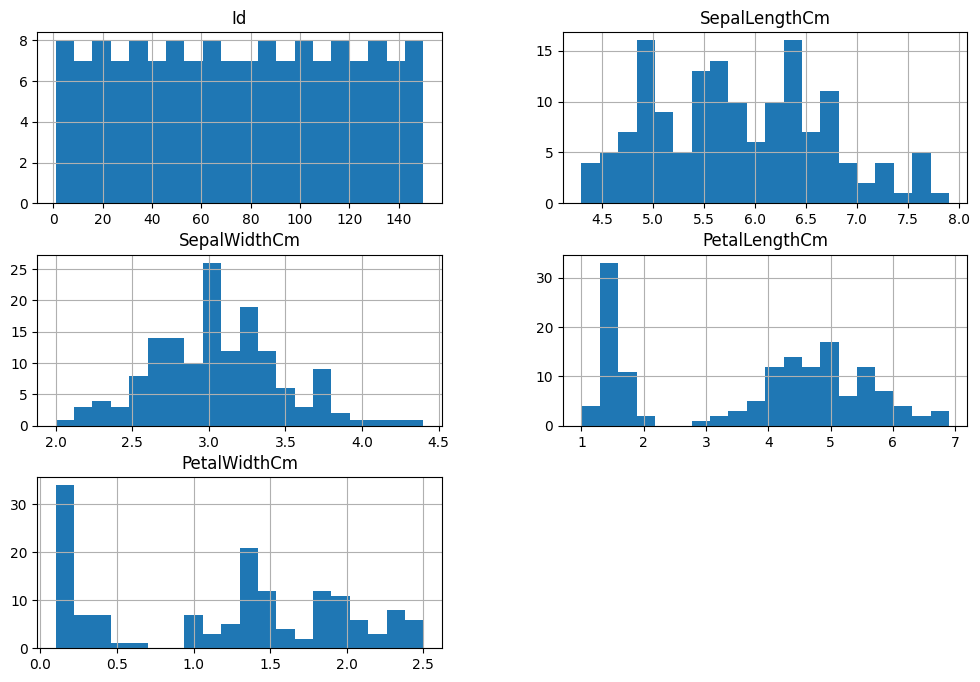

In [ ]:
# Cargar el conjunto de datos
df = pd.read_csv("/content/Iris.csv")
# Imprime las primeras filas del Dataset
print("Las primeras 5 Filas del DF:")
display(df.head())
# Imprime la informacion del DF
print("Informaciion del DF:")
display(df.info())
# Visualizar la distribucion de las variables quimicas a traves de Histogramas
df.hist(figsize=(12,8), bins=20)
plt.show()

In [ ]:
# Verificar valores nulos
print("Valores nulos:")
display(df.isnull().sum())
# Verificar los rangos de las variables}
print("Rango de las variables:")
display(df.describe())
# Detección de valores atípicos usando el rango intercuartílico (IQR)
# Seleccionar solo las columnas numéricas para el cálculo de IQR
df_numeric = df.select_dtypes(include=np.number)
# Calcular Q1, Q3 e IQR utilizando solo las columnas numéricas
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# La detección de valores atípicos debe hacerse también en las columnas numéricas
# Se ajusta la lógica para aplicar el filtro de IQR a df_numeric
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
print("Número de valores atípicos por columna:\n", outliers)

Valores nulos:


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Rango de las variables:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Número de valores atípicos por columna:
 Id               0
SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


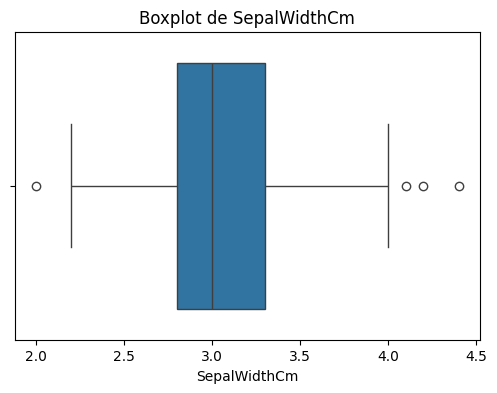

In [ ]:
# Verificacion del impacto de los valores atipicos en "SepalWidthCm"
# Crear boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["SepalWidthCm"])
plt.title("Boxplot de SepalWidthCm")
plt.show()

In [ ]:
# Tratar los valores atipicos en "SepalWidthCm"
Q1 = df["SepalWidthCm"].quantile(0.25)
Q3 = df["SepalWidthCm"].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los valores atípicos en SepalWidthCm
df_filtered = df[(df["SepalWidthCm"] >= (Q1 - 1.5 * IQR)) & (df["SepalWidthCm"] <= (Q3 + 1.5 * IQR))]

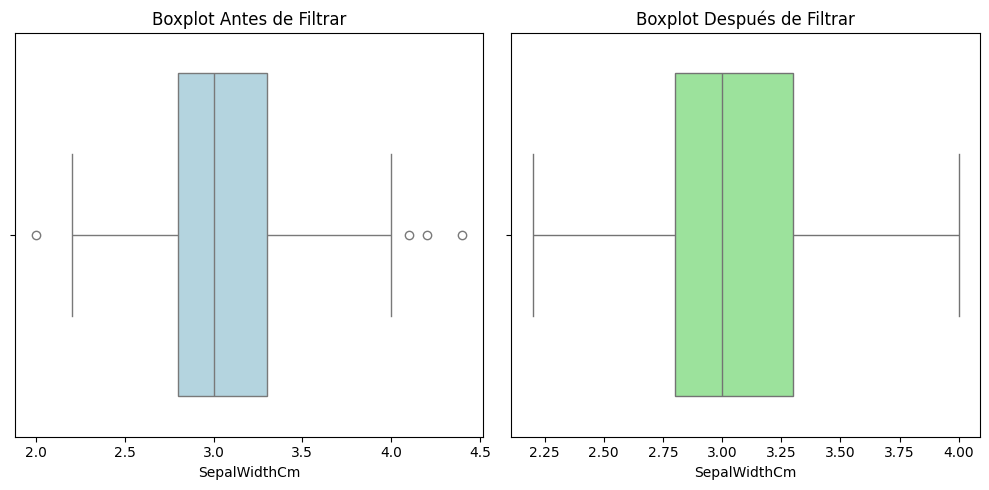

In [ ]:
# Crear gráficos de boxplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Boxplot antes y después del tratamiento
sns.boxplot(x=df["SepalWidthCm"], ax=axes[0], color="lightblue")
axes[0].set_title("Boxplot Antes de Filtrar")

sns.boxplot(x=df_filtered["SepalWidthCm"], ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot Después de Filtrar")

plt.tight_layout()
plt.show()

# 2- Exploración y preprocesamiento de datos:

In [ ]:
# Definir las características y la variable objetivo
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]  # Variables predictoras
target = "Species"  # Variable de clasificación
# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(df_filtered[features], df_filtered[target], test_size=0.2, random_state=42)

# Inicializar el escalador
scaler = StandardScaler()
# Ajustar el escalador solo con los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)
# Aplicar la transformación al conjunto de prueba sin ajustar nuevamente
X_test_scaled = scaler.transform(X_test)

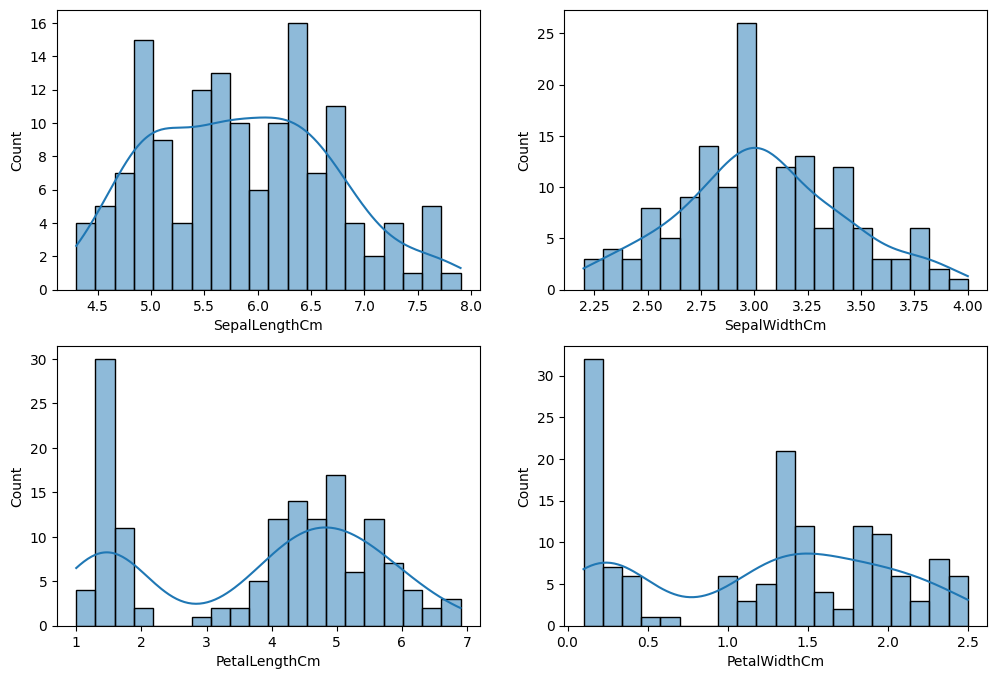

In [ ]:
# Definir características numéricas a visualizar
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

# Visualización con Histogramas
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico

# Iterar sobre cada característica para graficar su histograma
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)  # Crear una cuadrícula 2x2 para mostrar todas las variables
    sns.histplot(df_filtered[feature], bins=20, kde=True)  # Graficar la distribución con KDE

# 3- Aplicación de PCA:

In [ ]:
# Inicializar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)

# Aplicar PCA sobre los datos ya normalizados
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Mostrar resultados
print(f"Varianza explicada por el primer componente: {explained_variance[0]:.4f}")
print(f"Varianza explicada por el segundo componente: {explained_variance[1]:.4f}")
print(f"Varianza total explicada por los dos componentes: {np.sum(explained_variance) * 100:.2f}%")

Varianza explicada por el primer componente: 0.7158
Varianza explicada por el segundo componente: 0.2406
Varianza total explicada por los dos componentes: 95.63%


Resultados de la varianza:
- El primer componente explica el 71.58% de la variabilidad, lo que sugiere que hay una dirección dominante en la distribución de los datos.

- El segundo componente explica 24.06%, lo que complementa la separación de clases en un espacio bidimensional.

- La alta varianza acumulada (95.63%) confirma que el espacio reducido es muy representativo del dataset original.

#4- Visualización de los componentes principales:

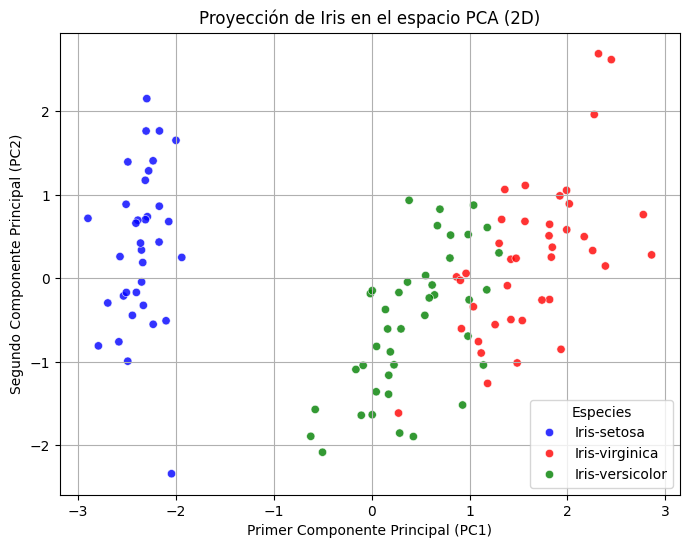

In [ ]:
# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(X_train_pca, columns=["PC1", "PC2"])
df_pca["Species"] = y_train.values  # Agregar la etiqueta de la especie

# Definir colores para cada clase
palette = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}

# Crear gráfico de dispersión con los componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Species", palette=palette, alpha=0.8)

# Agregar detalles al gráfico
plt.title("Proyección de Iris en el espacio PCA (2D)")
plt.xlabel("Primer Componente Principal (PC1)")
plt.ylabel("Segundo Componente Principal (PC2)")
plt.legend(title="Especies")
plt.grid(True)
plt.show()

#5- Interpretación de los resultados:


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
PC1       0.529028     -0.228044       0.586392      0.569447
PC2       0.350247      0.935544       0.003656      0.045503


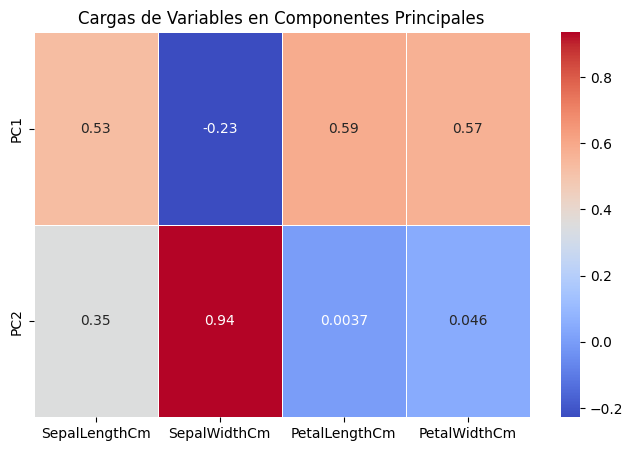

In [ ]:
# Obtener los coeficientes de los componentes principales
pca_components = pd.DataFrame(pca.components_, columns=features, index=["PC1", "PC2"])
# Mostrar la matriz de cargas
print(pca_components)
# Visualización de la importancia de cada variable
plt.figure(figsize=(8, 5))
sns.heatmap(pca_components, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Cargas de Variables en Componentes Principales")
plt.show()

Resumen:

- Los pétalos son el diferenciador principal en el dataset Iris, reflejado en PC1.

- El ancho del sépalo es el segundo factor clave y es capturado por PC2.

- El espacio PCA en 2D preserva el 95.63% de la varianza, lo que indica que la reducción dimensional es efectiva y mantiene la información relevante.

¿PCA es capaz de separar correctamente las clases?

- Sí, PCA ha mostrado que las especies de Iris pueden separarse bien en el espacio bidimensional generado por los dos primeros componentes principales.

¿Cómo mejora PCA la comprensión de los datos?

- PCA ayuda a visualizar datos complejos en un espacio más manejable sin sacrificar la estructura original.

- Como se pudo observar en los coeficientes en PC1 y PC2, confirmamos que el tamaño del pétalo es el principal diferenciador de especies.

- Al reducir las dimensiones, se pueden mejorar modelos de clasificación al eliminar ruido innecesario.

#Análisis de Resultados

PCA captura eficazmente la estructura del dataset, permitiendo reducir la dimensionalidad sin perder información esencial. La variabilidad explicada confirma que dos dimensiones son suficientes para representar los datos de Iris con alta precisión.

Utilidad de PCA para la Visualización en Clasificación:
- Reduce la dimensionalidad sin pérdida significativa de información, facilitando la exploración visual y mejorando la eficiencia computacional.
- Ayuda a identificar las variables más relevantes, mostrando cuáles contribuyen más a la variabilidad del dataset.
- Permite visualizar relaciones entre clases, destacando patrones en la estructura de los datos antes de aplicar un modelo supervisado.